In this notebook, I compare a logistic growth model with a modified form of the model. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 
from scipy.integrate import odeint

The growth model is:

$dN/dt = r(N)N$, 

where:

$r(N) = r_0 (1-(\frac{N}{K})^2)$

Plotting $dN/dt$ (as a function of N) using parameter values $r_0 = 0.0347$ and $K=1000$:

In [ ]:
r_0 = 0.0347
K = 1000

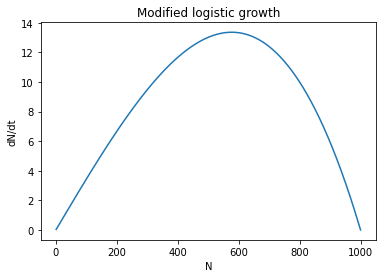

In [ ]:


N = np.linspace(1, 1000, num=1000)

dN_dt = r_0 * (1-(N/K)**2) * N

fig, ax = plt.subplots();

ax.plot (N, dN_dt)

ax.set(title = 'Modified logistic growth',
       xlabel = 'N',
       ylabel = 'dN/dt');



A logistic growth model, on the other hand, takes the form:

$dN/dt = r_0 (1-\frac{N}{K})N$

Plotting the logistic growth model:

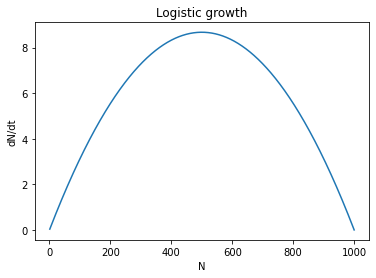

In [ ]:
r_0 = 0.0347
K = 1000

N = np.linspace(1, 1000, num=1000)

dN_dt = r_0 * (1-(N/K)) * N

fig, ax = plt.subplots();

ax.plot (N, dN_dt)

ax.set(title = 'Logistic growth',
       xlabel = 'N',
       ylabel = 'dN/dt');

Using scipy.optimize.fmin to find the value of N at which the growth rate is at a maximum (for the modified growth model)

In [ ]:
def f(x, r_0, K):
  return r_0 * (1-(x/K)**2) * x

max_N = optimize.fmin(lambda x: - f(x, r_0, K), 0, disp=False);

print ('The value of N at which the growth rate is maximised (modified logistic growth) is: ', max_N)

The value of N at which the growth rate is maximised (modified logistic growth) is:  [577.35025]


Doing the same for logistic growth:

In [ ]:
def f(x, r_0, K):
  return r_0 * (1-(x/K)) * x

max_N = optimize.fmin(lambda x: - f(x, r_0, K), 0, disp=False);

print ('The value of N at which the growth rate is maximised (logistic growth) is: ', max_N)

The value of N at which the growth rate is maximised (logistic growth) is:  [500.]


Solving the both growth models for $N_0 = 100$ and $N_0 = 5000$

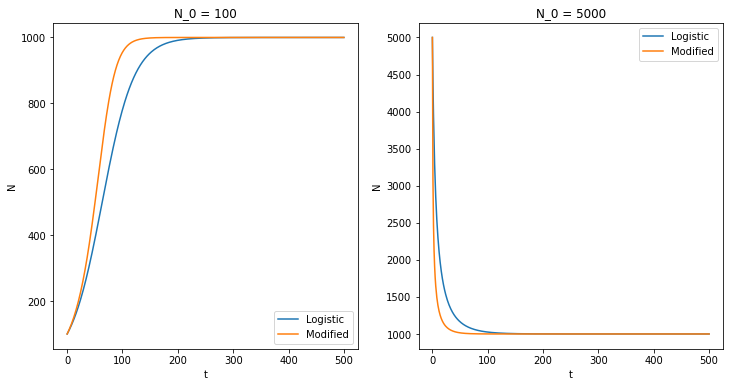

In [ ]:
#Logistic growth
def logistic (N,t, r_0, K):
  return r_0 * (1-(N/K)) * N

#Modified logistic growth
def modified_logistic (N,t, r_0, K):
  return r_0 * (1-(N/K)**2) * N

N_0 = 100;

t = np.linspace(0, 500, num=500);

N_logistic = odeint(logistic, N_0, t, args=(r_0, K))
N_modified_logistic = odeint(modified_logistic, N_0, t, args=(r_0, K))

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6));

ax1.plot(t, N_logistic)
ax1.plot(t, N_modified_logistic)

ax1.set(title = 'N_0 = 100', 
        xlabel = "t",
        ylabel = "N")

ax1.legend(['Logistic', 'Modified'])

N_0 = 5000;

t = np.linspace(0, 500, num=500);

N_logistic = odeint(logistic, N_0, t, args=(r_0, K))
N_modified_logistic = odeint(modified_logistic, N_0, t, args=(r_0, K))

ax2.plot(t, N_logistic)
ax2.plot(t, N_modified_logistic)

ax2.set(title = 'N_0 = 5000', 
        xlabel = "t",
        ylabel = "N")

ax2.legend(['Logistic', 'Modified'])



plt.show()




